### Projet 6 - Classifiez automatiquement des biens de consommation

### Objectifs

- Elargir la gamme de produits à l’épicerie fine. 
- Tester la collecte de produits à base de “champagne” via l’API "Edamam Food and Grocery Database". 
- Proposer un script ou notebook Python permettant une extraction des 10 premiers produits dans un fichier “.csv”, contenant pour chaque produit les données suivantes : foodId, label, category, foodContentsLabel, image.
- Respecter les normes RGPD.
- API via la plateforme RapidAPI.com car plus simple pour la documentation ici: https://rapidapi.com/edamam/api/edamam-food-and-grocery-database
- API EDAMAN :https://developer.edamam.com/food-database-api

### Imports et configs

In [12]:
import pandas as pd  
pd.set_option('display.max_columns', None) # Afficher toutes les colonnes

### Ecriture et teste de la requête pour obtenir les données via l’API.

#### Choisir l'abonnement à cet API (Basic)
https://rapidapi.com/edamam/api/edamam-food-and-grocery-database/playground/apiendpoint_8a93de83-850c-4262-91e7-83267041f4c9

### Exemple de requête pour obtenir les données via l’API avec script python

In [3]:
import requests

url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

querystring = {
    "nutrition-type": "cooking", 
    "category[0]": "generic-foods", 
    "health[0]": "alcohol-free"
}

headers = {
    "X-RapidAPI-Key": "YOUR_PRIVATE_API_KEY",  # Clé API privée
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com" # Hôte de l'API
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())


{'message': 'Too many requests'}


### Nous allons récupérer les données depuis l'API en recherchant spécifiquement le champagne comme ingrédient.

In [13]:
from dotenv import load_dotenv # Permet de charger les variables d'environnement à partir d'un fichier .env
import os

api_key = os.getenv("RAPIDAPI_KEY") # Clé API privée


# Charger les variables d'environnement depuis le fichier .env
load_dotenv() # permet de charger les variables d'environnement depuis le fichier .env et de ne pas les stocker directement dans le code pour des raisons de sécurité

url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser" 

# Champ de recherche pour l'ingrédient "champagne" est "ingr"
querystring = { # Paramètres de la requête GET
    "ingr": "champagne", # Ingrédient à rechercher
}


headers = {
    "X-RapidAPI-Key": api_key, # Clé API privée
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com" # Hôte de l'API
}

response = requests.get(url, headers=headers, params=querystring) # Envoi de la requête GET avec les paramètres
data = response.json() # Récupération des données au format JSON

### Filtrage des données conformément aux indications de l'énoncé avec les champs nécessaires : foodId, label, category, foodContentsLabel, image

In [14]:
# data = response.json()
filtered_data = []

if "hints" in data: # Vérifier si la clé "hints" existe dans les données, "hints" contient les informations sur les aliments par exemple "champagne"
    for item in data["hints"]: # Parcourir les éléments de la liste "hints"
        food_data = item.get('food', {}) # Récupérer les données de l'aliment
        relevant_info = {
            'foodId': food_data.get('foodId'), # Identifiant unique de l'aliment
            'label': food_data.get('label'), # Nom de l'aliment
            'category': food_data.get('category'), # Catégorie de l'aliment
            'foodContentsLabel': food_data.get('foodContentsLabel'), # Liste des ingrédients
            'image': food_data.get('image') # URL de l'image de l'aliment
        }
        filtered_data.append(relevant_info) # Ajouter les données filtrées à la liste

### Les données collectées via l’API sont stockées dans un fichier CSV et on récupère les 10 premiers produits.

In [15]:
import csv # Module pour la lecture et l'écriture de fichiers CSV
import os # Module pour les interactions avec le système d'exploitation

# Définir le chemin relatif vers le dossier "data"
data_folder = os.path.join('..', 'data') # Dossier "data" situé dans le répertoire parent
csv_file_path = os.path.join(data_folder, 'champagne_data.csv') # Chemin du fichier CSV

# Écriture des données filtrées dans un fichier CSV
with open(csv_file_path, 'w', newline='') as csvfile: # Ouverture du fichier CSV en mode écriture
    fieldnames = ["foodId", "label", "category", "foodContentsLabel", "image"] # Noms des colonnes
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames) # Création d'un objet DictWriter

    writer.writeheader() # Écrire les noms des colonnes dans le fichier CSV
    # Prendre seulement les 10 premiers éléments de la liste
    for row in filtered_data[:10]: # Parcourir les données filtrées
        writer.writerow(row) # Écrire les données dans le fichier CSV

### Lecture du fichier CSV pour vérifier les données

In [16]:
import os
import pandas as pd

# Définir le chemin relatif vers le dossier "data"
data_folder = os.path.join('..', 'data') # Dossier "data" situé dans le répertoire parent
csv_file_path = os.path.join(data_folder, 'champagne_data.csv') # Chemin du fichier CSV

# Lecture des données depuis le fichier CSV
df = pd.read_csv(csv_file_path, sep=",")

In [28]:
df

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,NaN,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,NaN
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,NaN
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,NaN
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,NaN
7,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,NaN
8,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,NaN
9,food_a79xmnya6togreaeukbroa0thhh0,Champagne Chicken,Generic meals,"Flour; Salt; Pepper; Boneless, Skinless Chicke...",NaN


Impossible de charger l'image à partir de l'URL : nan - Erreur : Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Impossible de charger l'image à partir de l'URL : nan - Erreur : Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Impossible de charger l'image à partir de l'URL : nan - Erreur : Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?


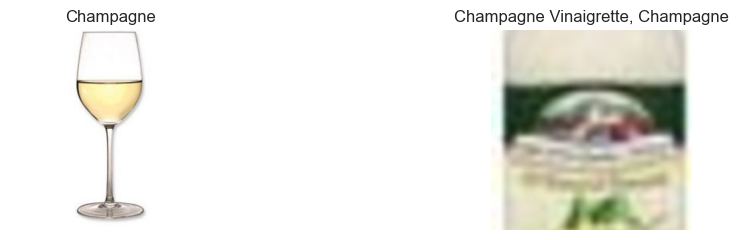

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Fonction pour afficher une image à partir de l'URL
def afficher_images(df, nombre_images=5):
    # Limiter le nombre d'images à afficher
    images = df['image'].tolist()[:nombre_images]
    
    # Configuration de la figure
    plt.figure(figsize=(15, 5))
    
    # Boucle pour parcourir et afficher les images
    for i, url in enumerate(images):
        try:
            # Requête pour télécharger l'image
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            
            # Affichage de l'image
            plt.subplot(1, nombre_images, i + 1)  # Afficher plusieurs images côte à côte
            plt.imshow(img)
            plt.axis('off')  # Désactiver les axes
            plt.title(df['label'].iloc[i])  # Ajouter un titre avec le nom du produit
            
        except Exception as e:
            print(f"Impossible de charger l'image à partir de l'URL : {url} - Erreur : {e}")
    
    plt.show()

# Appel de la fonction pour afficher les images
afficher_images(df, nombre_images=5)  # Afficher les 5 premières images


## Respect des normes RGPD et application à l'API


**Le RGPD** est une réglementation de l'Union européenne visant à protéger les données personnelles des individus. Il repose sur cinq principes clés :

1. **Licéité, loyauté et transparence** : Les données doivent être traitées de manière légale, honnête et transparente. Par exemple, les individus doivent être informés de la manière dont leurs données sont utilisées.
2. **Limitation des finalités** : Les données doivent être collectées pour des objectifs précis et légitimes. Par exemple, les données collectées pour une commande en ligne ne peuvent pas être utilisées à d'autres fins.
3. **Minimisation des données** : Seules les données strictement nécessaires doivent être collectées. Par exemple, un site Web ne doit pas demander des informations inutiles lors de la création d'un compte.
4. **Exactitude** : Les données doivent être exactes et mises à jour régulièrement. Par exemple, un site Web doit permettre aux utilisateurs de mettre à jour leurs informations personnelles.
5. **Limitation de la conservation** : Les données ne doivent pas être conservées plus longtemps que nécessaire. Par exemple, un site Web doit supprimer les données des utilisateurs inactifs après une certaine période.

### Application au projet :
- **Licéité et transparence** : Les données sont récupérées légalement via l'API et leur utilisation a été communiquée de manière transparente. Dans le cadre de ce projet, les données sont collectées pour élargir la gamme de produits à l'épicerie fine.
- **Limitation des finalités** : Seules les données spécifiques sur les aliments (par exemple, le champagne) sont collectées. Dans ce cas, les données ne seront pas utilisées à d'autres fins. Dans le cadre de ce projet, les données sont collectées pour élargir la gamme de produits à l'épicerie fine.
- **Minimisation des données** : Seuls les champs essentiels (foodId, label, category, etc.) sont retenus. Les données collectées sont limitées aux informations nécessaires pour le projet.
- **Exactitude** : Les données proviennent directement de l'API, garantissant ainsi leur exactitude. Les données ne sont pas modifiées après leur collecte.
- **Limitation de la conservation** : Les données sont conservées uniquement pour la durée du projet. Dans ce cas, les données collectées sont stockées dans un fichier CSV pour une utilisation ultérieure.

Cela garantit le respect des principes du RGPD tout au long du traitement des données issues de l'API.